n general, las pruebas de un proyecto de Machine Learning implican la evaluación del modelo en un conjunto de datos de prueba independiente que el modelo nunca ha visto antes. Asegurarse de que el modelo funciona bien no solo en los datos de entrenamiento y validación, sino también en los datos de prueba, es una forma de comprobar que el modelo generaliza bien a nuevos datos. Aquí hay un ejemplo de cómo podrías hacer esto:

Primero, necesitarías dividir tus datos en conjuntos de entrenamiento, validación y prueba. Podrías hacer esto de la siguiente manera:

python
Copy code
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
Después de entrenar tu modelo en los datos de entrenamiento y validación como antes, podrías evaluarlo en los datos de prueba de la siguiente manera:

python
Copy code
# Codificar los datos de prueba
X_test_encoded = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values)).map(encode_reviews)
test_dataset = X_test_encoded.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
En esta etapa, es importante recordar que solo debes usar los datos de prueba una vez, después de haber terminado de ajustar tu modelo. Utilizar los datos de prueba varias veces durante el proceso de ajuste del modelo puede llevar a un sobreajuste en los datos de prueba, lo que puede dar una idea engañosa de cómo el modelo se desempeñará en nuevos datos.

Este código realiza el entrenamiento de un modelo CamemBERT para la clasificación de secuencias y luego grafica la pérdida y precisión durante el entrenamiento. Aquí está una explicación sencilla del código:

Se importan las bibliotecas necesarias, incluyendo matplotlib para graficar, sklearn para dividir los datos en conjuntos de entrenamiento y prueba, transformers para el tokenizador y el modelo CamemBERT, tensorflow para el entrenamiento del modelo, y pandas para trabajar con datos tabulares.

Se carga un conjunto de datos en un DataFrame utilizando la función read_csv de pandas. Los datos deben estar en un archivo CSV con una columna llamada "phrase" para las secuencias y una columna llamada "label" para las etiquetas.

Los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función train_test_split de sklearn. Los textos se almacenan en X_train y X_val, y las etiquetas se almacenan en y_train y y_val. El tamaño del conjunto de prueba se establece en un 20% del tamaño total de los datos.

Se preparan los datos para el modelo CamemBERT utilizando el tokenizador. Se define una función llamada encode_reviews que toma un texto y una etiqueta, y utiliza el tokenizador para codificar el texto. La función devuelve los input_ids, attention_mask y la etiqueta codificada. Luego, se define otra función llamada tf_encode que utiliza tf.py_function para aplicar la función encode_reviews a los tensores de texto y etiqueta. Esta función asegura que los tensores tengan las formas adecuadas para el modelo.

Los tensores de texto y etiqueta se convierten a tensores de TensorFlow utilizando tf.convert_to_tensor. Esto es necesario para crear un conjunto de datos de TensorFlow.

Se crea un conjunto de datos de TensorFlow para los conjuntos de entrenamiento y prueba utilizando tf.data.Dataset.from_tensor_slices. Luego, se aplica la función tf_encode a cada muestra del conjunto de datos utilizando map.

Se define el tamaño del búfer y el tamaño del lote (batch size) para el conjunto de entrenamiento. El conjunto de entrenamiento se mezcla aleatoriamente utilizando shuffle, se agrupa en lotes utilizando batch, y se prefetcha para un rendimiento óptimo utilizando prefetch.

Se carga el modelo CamemBERT utilizando TFCamembertForSequenceClassification.from_pretrained. El modelo se inicializa con el tokenizador "camembert-base" y el número de etiquetas es igual al número de clases únicas en la columna de etiquetas del DataFrame.

Se define un optimizador y una función de pérdida para el modelo utilizando tf.keras.optimizers.Adam y tf.keras.losses.SparseCategoricalCrossentropy, respectivamente.

Se compila el modelo utilizando model.compile, especificando el optimizador, la función de pérdida y las métricas de evaluación.

Se entrena el modelo utilizando model.fit en el conjunto de entrenamiento y se valida en el conjunto de prueba. El número de épocas de entrenamiento se establece en 3.

Se grafican la pérdida y la precisión del entrenamiento y la validación utilizando matplotlib. Se crea una figura con dos subtramas y se trazan las curvas de pérdida y precisión para cada conjunto de datos.

Finalmente, se muestra la figura con las curvas de pérdida y precisión utilizando plt.show()

modelo de entrenamiento

C:\Users\kn-dr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
207/207 [==============================] - 1141s 5s/step - loss: 1.5290 - accuracy: 0.3908 - val_loss: 1.3040 - val_accuracy: 0.5386
Epoch 2/3
207/207 [==============================] - 1199s 6s/step - loss: 1.0766 - accuracy: 0.6388 - val_loss: 0.8569 - val_accuracy: 0.7029
Epoch 3/3
207/207 [==============================] - 1355s 7s/step - loss: 0.7478 - accuracy: 0.7659 - val_loss: 0.6807 - val_accuracy: 0.7754


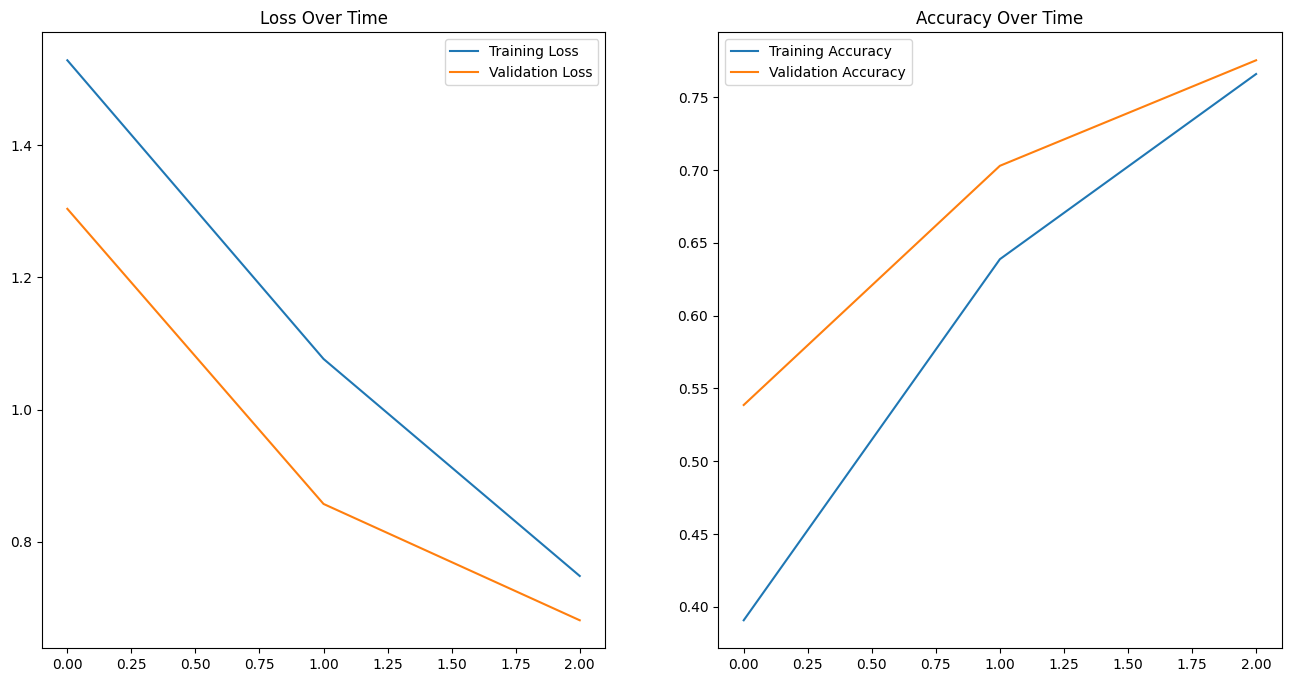

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification
import tensorflow as tf
import pandas as pd

# Carga tus datos en un DataFrame
df = pd.read_csv('../../dataset/processed_data.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(df['phrase'].fillna(''), df['label'], test_size=0.2, random_state=42)

# Preparar los datos para el modelo CamemBERT
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

def encode_reviews(text, label):
    encoded_dict = tokenizer.encode_plus(
        text.numpy().decode('utf-8'),
        add_special_tokens = True,
        max_length = 64,
        padding='max_length',
        truncation=True,
        return_attention_mask = True,
        return_tensors = 'tf',
    )

    # Extraer los inputs del diccionario codificado
    input_id = encoded_dict['input_ids'][0]
    attention_mask = encoded_dict['attention_mask'][0]

    return input_id, attention_mask, label

def tf_encode(text_tensor, label_tensor):
    input_id, attention_mask, label = tf.py_function(encode_reviews, [text_tensor, label_tensor], [tf.int32, tf.int32, tf.int64])
    input_id.set_shape([64])
    attention_mask.set_shape([64])
    label.set_shape([])
    return {'input_ids': input_id, 'attention_mask': attention_mask}, label

text_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.string)
label_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.int64)

text_val_tensor = tf.convert_to_tensor(X_val.values, dtype=tf.string)
label_val_tensor = tf.convert_to_tensor(y_val.values, dtype=tf.int64)

X_train_encoded = tf.data.Dataset.from_tensor_slices((text_tensor, label_tensor)).map(tf_encode)
X_val_encoded = tf.data.Dataset.from_tensor_slices((text_val_tensor, label_val_tensor)).map(tf_encode)

BUFFER_SIZE = 10000
BATCH_SIZE = 16

train_dataset = X_train_encoded.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = X_val_encoded.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Entrenar el modelo CamemBERT
model = TFCamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=len(df['label'].unique()))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Define a loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=val_dataset, epochs=3)


# Graficar la pérdida y la precisión
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

plt.show()


In [7]:
# Guardar el modelo después de entrenar
model.save_pretrained('../../models/path_to_save_model')

Epoch 1/3: Esto indica que el modelo está en su primera iteración (o "época") de entrenamiento. Tu modelo se entrenará en un total de 3 épocas.

207/207 [==============================] - 881s 4s/step - loss: 1.5107 - accuracy: 0.4226 - val_loss: 1.2316 - val_accuracy: 0.5768: Durante la primera época, tu modelo logró una precisión del 42.26% en el conjunto de entrenamiento, con una pérdida de 1.5107. En el conjunto de validación, logró una precisión del 57.68% y una pérdida de 1.2316. Esto es bastante común para la primera época y puedes esperar que estos números mejoren en las épocas siguientes.

Epoch 2/3 y Epoch 3/3: Estas líneas muestran los resultados del entrenamiento durante la segunda y tercera época, respectivamente. Puedes ver que tanto la pérdida como la precisión están mejorando con cada época, lo que es una buena señal.

En la última época, tu modelo alcanzó una precisión del 77.06% en el conjunto de entrenamiento y una precisión del 78.72% en el conjunto de validación. Esto es bastante bueno y muestra que tu modelo está aprendiendo a clasificar los textos correctamente.

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification
import tensorflow as tf
import pandas as pd


In [7]:
# Carga tus datos en un DataFrame
df = pd.read_csv('../../dataset/processed_data.csv')

# Verifica las etiquetas
print(df['label'].head())  # Asegúrate de que las etiquetas sean enteros

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
207/207 [==============================] - 1172s 5s/step - loss: 1.5016 - accuracy: 0.4174 - val_loss: 1.2120 - val_accuracy: 0.5833
Epoch 2/5
207/207 [==============================] - 1085s 5s/step - loss: 1.0274 - accuracy: 0.6475 - val_loss: 0.8697 - val_accuracy: 0.6957
Epoch 3/5
207/207 [==============================] - 1058s 5s/step - loss: 0.7455 - accuracy: 0.7623 - val_loss: 0.6849 - val_accuracy: 0.7729
Epoch 4/5
207/207 [==============================] - 1070s 5s/step - loss: 0.5638 - accuracy: 0.8236 - val_loss: 0.5828 - val_accuracy: 0.8007
Epoch 5/5
207/207 [==============================] - 1117s 5s/step - loss: 0.4785 - accuracy: 0.8460 - val_loss: 0.5286 - val_accuracy: 0.8297


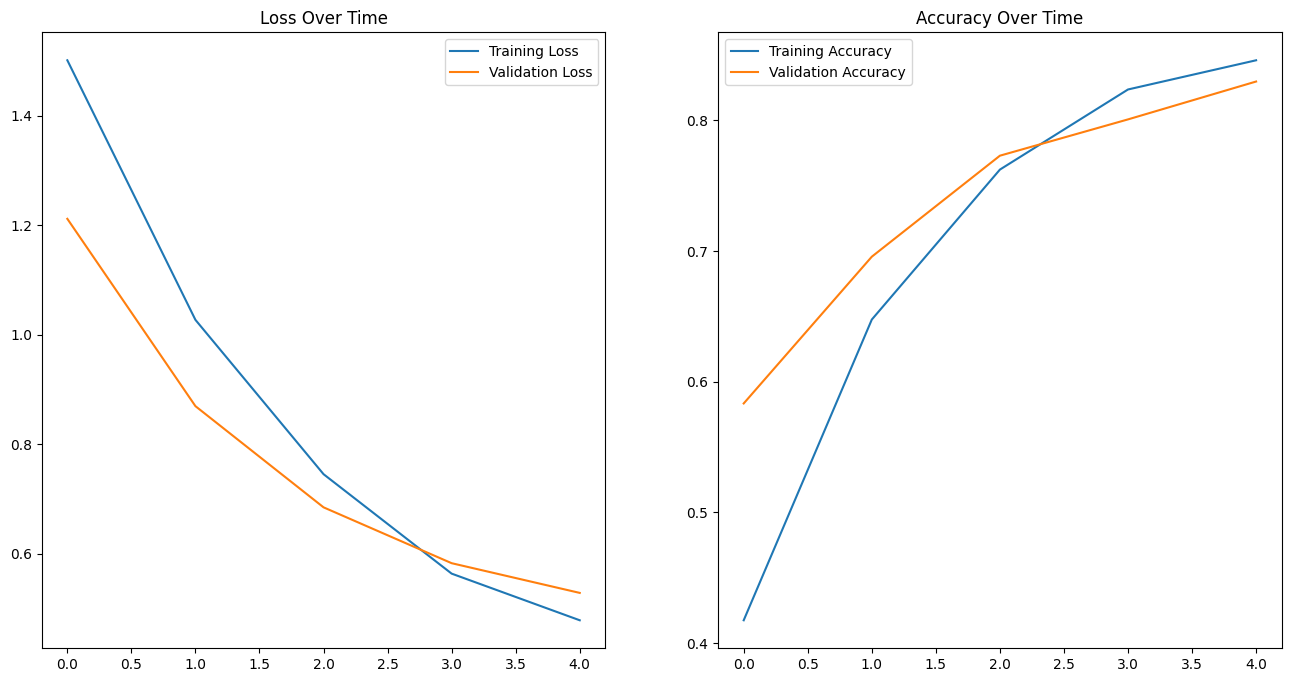

In [10]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification
import tensorflow as tf
import pandas as pd

# Cargar tus datos en un DataFrame
df = pd.read_csv('../../dataset/processed_data.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(df['phrase'].fillna(''), df['label'], test_size=0.2, random_state=42)

# Preparar los datos para el modelo CamemBERT
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

def encode_reviews(text, label):
    encoded_dict = tokenizer.encode_plus(
        text.numpy().decode('utf-8'),
        add_special_tokens=True,
        max_length=64,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf',
    )

    # Extraer los inputs del diccionario codificado
    input_id = encoded_dict['input_ids'][0]
    attention_mask = encoded_dict['attention_mask'][0]

    return input_id, attention_mask, label

def tf_encode(text_tensor, label_tensor):
    input_id, attention_mask, label = tf.py_function(encode_reviews, [text_tensor, label_tensor], [tf.int32, tf.int32, tf.int64])
    input_id.set_shape([64])
    attention_mask.set_shape([64])
    label.set_shape([])
    return {'input_ids': input_id, 'attention_mask': attention_mask}, label

text_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.string)
label_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.int64)

text_val_tensor = tf.convert_to_tensor(X_val.values, dtype=tf.string)
label_val_tensor = tf.convert_to_tensor(y_val.values, dtype=tf.int64)

X_train_encoded = tf.data.Dataset.from_tensor_slices((text_tensor, label_tensor)).map(tf_encode)
X_val_encoded = tf.data.Dataset.from_tensor_slices((text_val_tensor, label_val_tensor)).map(tf_encode)

BUFFER_SIZE = 10000
BATCH_SIZE = 16

train_dataset = X_train_encoded.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = X_val_encoded.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Entrenar el modelo CamemBERT
model = TFCamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=len(df['label'].unique()))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Define a loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define additional metrics
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Definir el directorio de checkpoints
checkpoint_dir = os.path.join(os.getcwd(), 'checkpoints')
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Guardar el modelo después de cada época en la carpeta de checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_checkpoint_{epoch:02d}'),
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=5, callbacks=[checkpoint_callback])

# Graficar la pérdida y la precisión
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

plt.show()


In [14]:
import os
from transformers import TFCamembertForSequenceClassification, CamembertTokenizer

# Definir el directorio para guardar el modelo
model_base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'models'))
model_dir = os.path.join(model_base_dir, 'path_to_save_model')




if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [17]:
import os
from transformers import TFCamembertForSequenceClassification, CamembertTokenizer

# Definir el directorio para guardar el modelo
model_base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'models'))
model_dir = os.path.join(model_base_dir, 'path_to_save_model')

# Crear el directorio si no existe
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Guardar el modelo y el tokenizador
try:
    model.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)
    print(f"Model and tokenizer successfully saved in {model_dir}")
except Exception as e:
    print(f"Error saving model: {e}")


Model and tokenizer successfully saved in d:\Python Code\Project\analyzer\models\path_to_save_model


ajuste de hyper parametros

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
207/207 [==============================] - 2048s 10s/step - loss: 1.3834 - accuracy: 0.4684 - val_loss: 0.9965 - val_accuracy: 0.6039
Epoch 2/5
207/207 [==============================] - 61881s 300s/step - loss: 0.8447 - accuracy: 0.7079 - val_loss: 0.6526 - val_accuracy: 0.7923
Epoch 3/5
207/207 [==============================] - 1555s 7s/step - loss: 0.5392 - accuracy: 0.8263 - val_loss: 0.4982 - val_accuracy: 0.8442
Epoch 4/5
207/207 [==============================] - 1527s 7s/step - loss: 0.3721 - accuracy: 0.8792 - val_loss: 0.4410 - val_accuracy: 0.8478
Epoch 5/5
207/207 [==============================] - 1526s 7s/step - loss: 0.2593 - accuracy: 0.9169 - val_loss: 0.5008 - val_accuracy: 0.8502


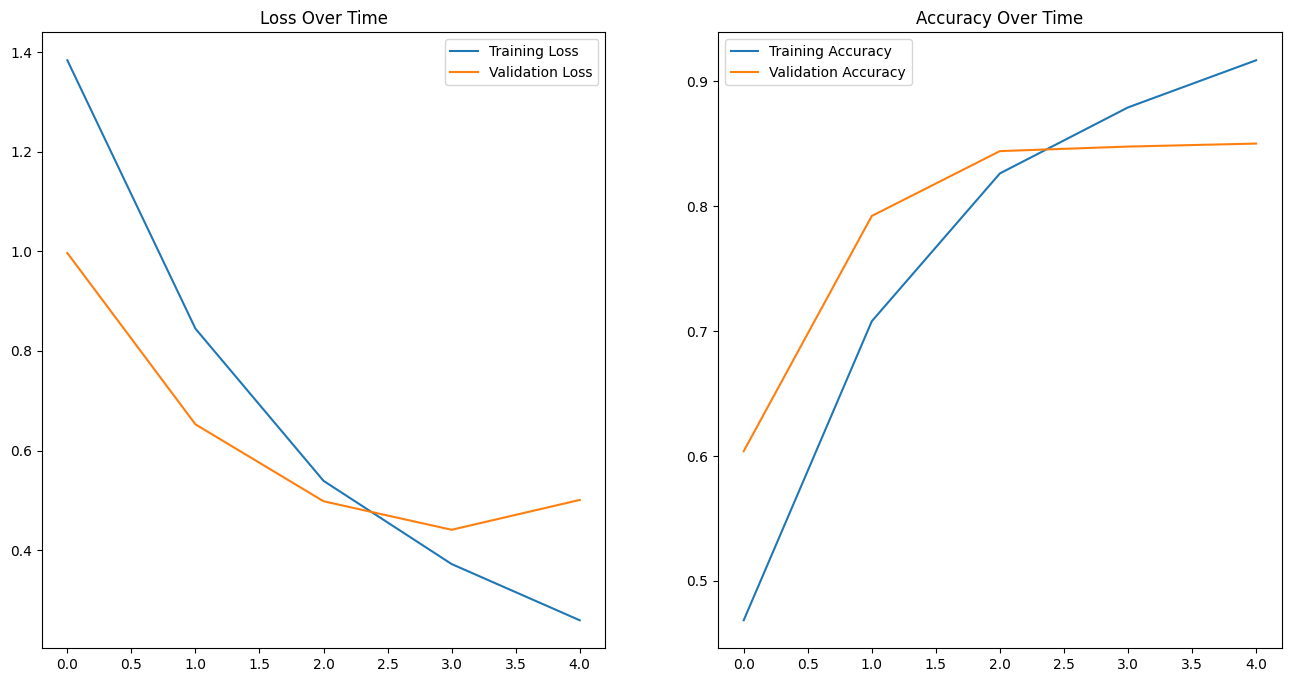

In [13]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification
import tensorflow as tf
import pandas as pd

# Cargar tus datos en un DataFrame
df = pd.read_csv('../../dataset/processed_data.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(df['phrase'].fillna(''), df['label'], test_size=0.2, random_state=42)

# Preparar los datos para el modelo CamemBERT
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

def encode_reviews(text, label):
    encoded_dict = tokenizer.encode_plus(
        text.numpy().decode('utf-8'),
        add_special_tokens=True,
        max_length=128,  # Ajuste del max_length
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf',
    )

    # Extraer los inputs del diccionario codificado
    input_id = encoded_dict['input_ids'][0]
    attention_mask = encoded_dict['attention_mask'][0]

    return input_id, attention_mask, label

def tf_encode(text_tensor, label_tensor):
    input_id, attention_mask, label = tf.py_function(encode_reviews, [text_tensor, label_tensor], [tf.int32, tf.int32, tf.int64])
    input_id.set_shape([128])  # Ajuste del max_length
    attention_mask.set_shape([128])  # Ajuste del max_length
    label.set_shape([])
    return {'input_ids': input_id, 'attention_mask': attention_mask}, label

text_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.string)
label_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.int64)

text_val_tensor = tf.convert_to_tensor(X_val.values, dtype=tf.string)
label_val_tensor = tf.convert_to_tensor(y_val.values, dtype=tf.int64)

X_train_encoded = tf.data.Dataset.from_tensor_slices((text_tensor, label_tensor)).map(tf_encode)
X_val_encoded = tf.data.Dataset.from_tensor_slices((text_val_tensor, label_val_tensor)).map(tf_encode)

BUFFER_SIZE = 10000
BATCH_SIZE = 16

train_dataset = X_train_encoded.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = X_val_encoded.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Entrenar el modelo CamemBERT
model = TFCamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=len(df['label'].unique()))
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Ajuste de la tasa de aprendizaje

# Define a loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define additional metrics
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Definir el directorio de checkpoints
checkpoint_dir = os.path.join(os.getcwd(), 'checkpoints')
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Guardar el modelo después de cada época en la carpeta de checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_checkpoint_{epoch:02d}'),
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=5, callbacks=[checkpoint_callback])

# Graficar la pérdida y la precisión
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

plt.show()
